## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [413]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore") # ignore all warnings

In [414]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [415]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv") 
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

In [416]:
# we can skip the first 2 rows of the data set.
inp0= pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


##### Dropping customerid column

In [417]:
inp0.drop("customerid", axis = 1, inplace = True) # drop the customerid column
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


##### Dividing jobedu into job and education

In [418]:
inp0['job'] = inp0.jobedu.apply(lambda x: x.split(",")[0]) # extract the job from jobedu
inp0['edu'] = inp0.jobedu.apply(lambda x: x.split(",")[1]) # extract the education from jobedu
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


##### Drop jobedu column 

In [419]:
inp0.drop("jobedu", axis = 1, inplace = True) # drop the jobedu column
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the value of month from the column 'month'

In [420]:
inp0['month'] = inp0['month'].apply(lambda x: x.split("_")[0] if isinstance(x, str) else x)  # extract the month if string
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [421]:
inp0[inp0.month.apply(lambda x: isinstance(x, float)) == True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


#### Checking missing values

In [422]:
inp0.isnull().sum() # check the null values in the data set

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

In [423]:
inp0.shape

(45211, 19)

##### Handling missing values

In [424]:
float(100.0*20/45211) # calculate the percentage of null values in the data set

0.04423702196368141

In [425]:
# Drop records with age missing 
inp1 = inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

In [426]:
inp1.age.isnull().sum()

np.int64(0)

In [427]:
# Handle the missing values in the 'month' column
inp1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [428]:
month_mode = inp1.month.mode()[0] # get the mode of the month column
month_mode

'may, 2017'

In [429]:
inp1.month.fillna(month_mode, inplace = True) # fill the missing values with the mode
inp1.month.value_counts(normalize = True) # check the month column again

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [430]:
inp1.month.isnull().sum()

np.int64(0)

In [431]:
inp1.pdays.describe() # check the pdays column

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates that the values !!!

#### How to handle missing values ?

##### Remember our objective!

- we want the missing values to be ignored in the calculations
- simply make it missing - replace -1 with NaN
- all summary statistics - mean, median etc. will ignore NaN values

In [432]:
inp1.loc[inp1.pdays <0, "pdays"] = np.nan # replace the pdays values less than 0 with NaN
inp1.pdays.describe() # check the pdays column again

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [433]:
# Print the head of the data frame.
inp1.head()


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [434]:
#read the file in inp0 without first two rows as it is of no use.
inp0 = pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)

In [435]:
#print the head of the data frame.
inp0.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [436]:
#print the information of variables to check their data types.
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [437]:
#convert the age variable data type from float to integer.
inp0['age'] = inp0['age'].astype('Int64')  # Using Int64 to handle null values
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  int64 
 1   age         45191 non-null  Int64 
 2   salary      45211 non-null  int64 
 3   balance     45211 non-null  int64 
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  int64 
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  int64 
 15  pdays       45211 non-null  int64 
 16  previous    45211 non-null  int64 
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: Int64(1), int64(7), object(11)
memory usage

In [438]:
#print the average age of customers.
print(f"Average age of customers: {inp0['age'].mean():.2f} years")


Average age of customers: 40.94 years


#### Dropping customer id column. 

In [439]:
#drop the customer id as it is of no use.
inp0.drop('customerid', axis=1, inplace=True)
inp0.head()


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [440]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job'] = inp0.jobedu.apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

In [441]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education'] = inp0.jobedu.apply(lambda x: x.split(",")[1] if isinstance(x, str) else x)

In [442]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu', axis=1, inplace=True)
inp0.head()


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [443]:
#count the missing values in age column.
inp0['age'].isnull().sum()


np.int64(20)

In [444]:
# print the shape of dataframe inp0
inp0.shape


(45211, 19)

In [445]:
#calculate the percentage of missing values in age column.
age_missing_pct = 100.0 * inp0['age'].isnull().sum() / inp0.shape[0]
print(f"Percentage of missing values in age column: {age_missing_pct:.4f}%")


Percentage of missing values in age column: 0.0442%


Drop the records with age missing. 

In [446]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1 = inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

#### handling missing values in month column

In [447]:
#count the missing values in month column in inp1.
inp1['month'].isnull().sum()


np.int64(50)

In [448]:
#print the percentage of each month in the data frame inp1.
inp1['month'].value_counts(normalize=True).sort_values(ascending=False)


month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [449]:
#find the mode of month in inp1
month_mode = inp1['month'].mode()[0]
print(f"Mode of month column: {month_mode}")


Mode of month column: may, 2017


In [450]:
# fill the missing values with mode value of month in inp1.
inp1['month'].fillna(month_mode, inplace=True)


In [451]:
# Let's see the null values in the month column.
inp1['month'].isnull().sum()


np.int64(0)

#### handling missing values in response column 

In [452]:
#count the missing values in response column in inp1.
inp1['response'].isnull().sum()


np.int64(30)

In [453]:
#calculate the percentage of missing values in response column. 
response_missing_pct = 100.0 * inp1['response'].isnull().sum() / inp1.shape[0]
print(f"Percentage of missing values in response column: {response_missing_pct:.4f}%")


Percentage of missing values in response column: 0.0664%


Target variable is better of not imputed.
- Drop the records with missing values.

In [454]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1.response.isnull()].copy()
inp1.shape


(45161, 19)

In [455]:
#calculate the missing values in each column of data frame: inp1.
missing_values = inp1.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values


Missing values in each column:
Series([], dtype: int64)


#### handling pdays column. 

In [456]:
#describe the pdays column of inp1.
inp1['pdays'].describe()


count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [457]:
#describe the pdays column with considering the -1 values.
# Replace -1 values with NaN to properly analyze valid pdays
inp1.loc[inp1.pdays < 0, 'pdays'] = np.nan
inp1['pdays'].describe()


count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [458]:
#describe the age variable in inp1.
inp1['age'].describe()


count      45161.0
mean     40.935763
std       10.61879
min           18.0
25%           33.0
50%           39.0
75%           48.0
max           95.0
Name: age, dtype: Float64

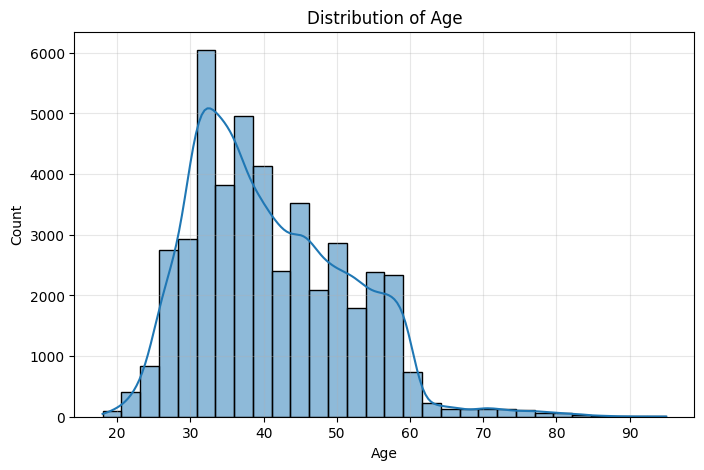

In [513]:
#plot the histogram of age variable.
plt.figure(figsize=(8, 5))
sns.histplot(inp1['age'].to_numpy(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()


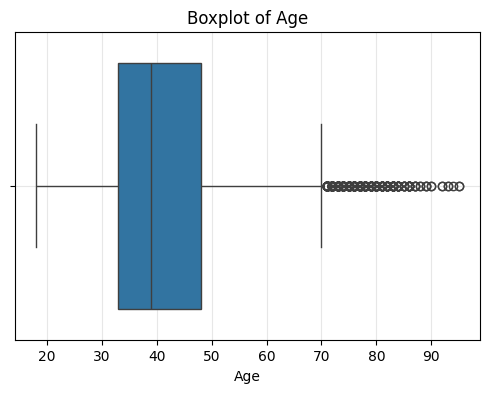

In [460]:
#plot the boxplot of age variable.
plt.figure(figsize=(6, 4))
sns.boxplot(x=inp1['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True, alpha=0.3)
plt.show()


#### Salary variable 

In [461]:
#describe the salary variable of inp1.
inp1['salary'].describe()


count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

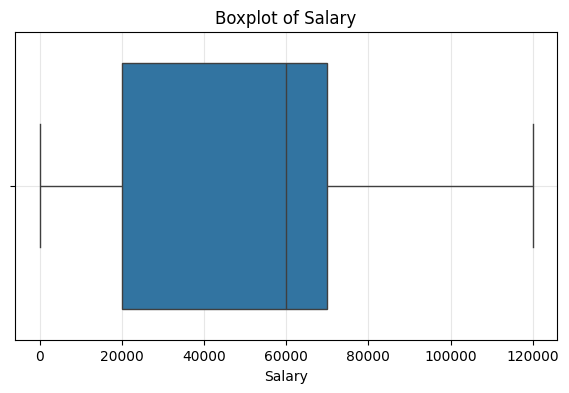

In [ ]:
#plot the boxplot of salary variable.
plt.figure(figsize=(7, 4))
sns.boxplot(x=inp1['salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.grid(True, alpha=0.3)
plt.show()

#### Balance variable 

In [463]:
#describe the balance variable of inp1.
inp1['balance'].describe()


count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

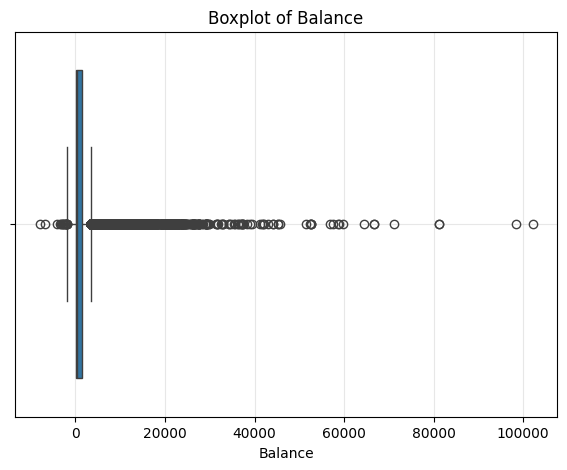

In [515]:
#plot the boxplot of balance variable.
plt.figure(figsize=(7, 5))
sns.boxplot(x=inp1['balance'])
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.grid(True, alpha=0.3)
plt.show()


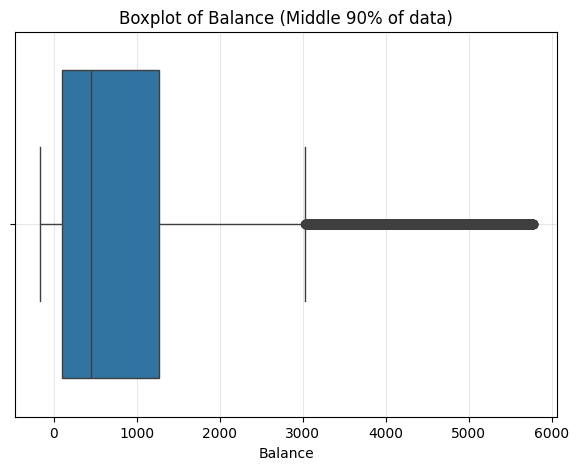

In [516]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(7, 5))
# Using robust scaling to reduce impact of outliers
q_low = inp1['balance'].quantile(0.05)  # 5th percentile
q_high = inp1['balance'].quantile(0.95)  # 95th percentile
filtered_balance = inp1[(inp1['balance'] >= q_low) & (inp1['balance'] <= q_high)]['balance']
sns.boxplot(x=filtered_balance)
plt.title('Boxplot of Balance (Middle 90% of data)')
plt.xlabel('Balance')
plt.grid(True, alpha=0.3)
plt.show()


In [466]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
quantiles = [0.5, 0.7, 0.9, 0.95, 0.99]
balance_quantiles = inp1['balance'].quantile(quantiles)
print("Balance Quantiles:")
for q, value in zip(quantiles, balance_quantiles):
    print(f"{q*100}%: {value:.2f}")


Balance Quantiles:
50.0%: 448.00
70.0%: 1126.00
90.0%: 3576.00
95.0%: 5769.00
99.0%: 13173.40


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [467]:
#describe the duration variable of inp1
inp1['duration'].describe()


count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [468]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.

# Create a new standardized duration column
inp1['duration_mins'] = inp1['duration'].apply(
    lambda x: float(x.split()[0])/60 if isinstance(x, str) and 'sec' in x else 
              float(x.split()[0]) if isinstance(x, str) and 'min' in x else 
              np.nan
)

# Display sample results
print("Sample duration conversions:")
print(inp1[['duration', 'duration_mins']].head(10))


Sample duration conversions:
  duration  duration_mins
0  261 sec       4.350000
1  151 sec       2.516667
2   76 sec       1.266667
3   92 sec       1.533333
4  198 sec       3.300000
5  139 sec       2.316667
6  217 sec       3.616667
7  380 sec       6.333333
8   50 sec       0.833333
9   55 sec       0.916667


In [469]:
#describe the duration variable
#describe the standardized duration variable
inp1['duration_mins'].describe()


count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_mins, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [470]:
inp0.duration.describe()

count       45211
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [471]:
inp0.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [472]:
#calculate the percentage of each marital status category. 
inp0.marital.value_counts(normalize = True)

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

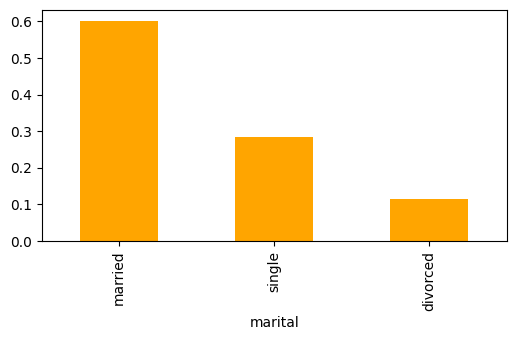

In [473]:
#plot the bar graph of percentage marital status categories
inp0.marital.value_counts(normalize = True).plot(kind = "bar", figsize = (6, 3), color = "orange")
plt.show

#### Job  

In [474]:
#calculate the percentage of each job status category.
inp0.job.value_counts(normalize = True)


job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64

<Axes: xlabel='job'>

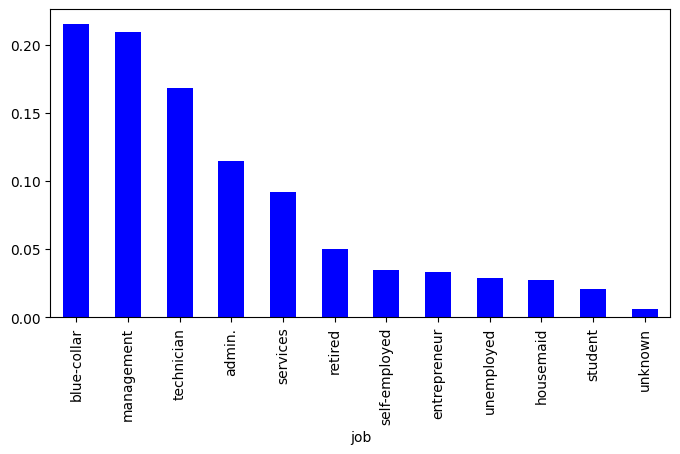

In [475]:
#plot the bar graph of percentage job categories
inp0.job.value_counts(normalize = True).plot(kind = "bar", figsize = (8, 4), color = "Blue")

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [476]:
#calculate the percentage of each education category.
inp0.education.value_counts(normalize = True)

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

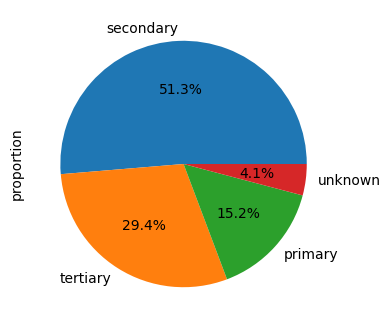

In [477]:
#plot the pie chart of education categories
inp0.education.value_counts(normalize = True).plot(kind = "pie", figsize = (6, 4), autopct='%1.1f%%')

#### poutcome 

In [478]:
#calculate the percentage of each poutcome category.
inp0.poutcome.value_counts(normalize = True)

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

<Axes: xlabel='poutcome'>

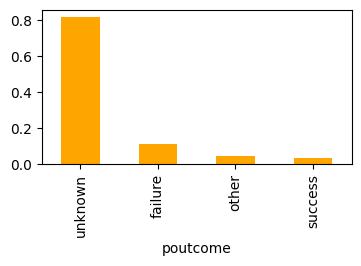

In [479]:
inp0.poutcome.value_counts(normalize = True).plot(kind = "bar", figsize = (4, 2), color = "orange")

<Axes: xlabel='poutcome'>

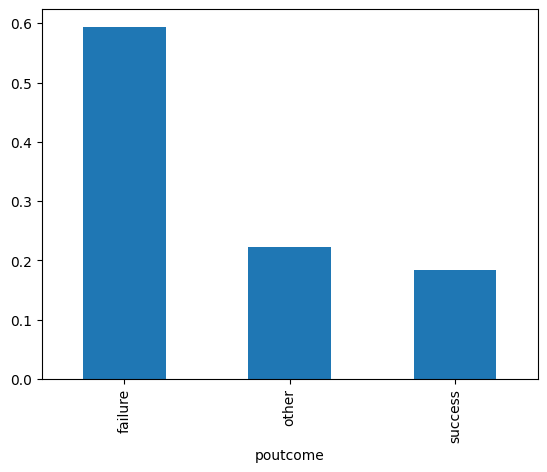

In [480]:
inp0[~(inp0.poutcome=="unknown")].poutcome.value_counts(normalize = True).plot.bar()

#### Response the target variable 

In [481]:
#calculate the percentage of each response category.
inp0.response.value_counts(normalize =True)

response
no     0.882982
yes    0.117018
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

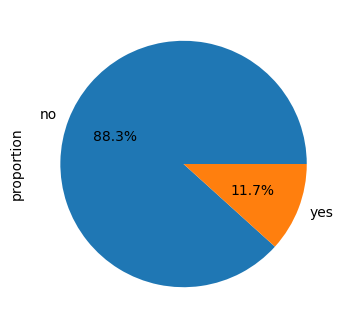

In [482]:
#plot the pie chart of response categories
inp0.response.value_counts(normalize = True).plot(kind = "pie", figsize = (6, 4), autopct='%1.1f%%')

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

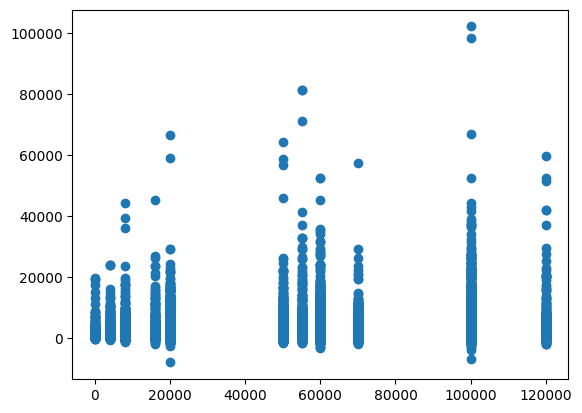

In [483]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp0.salary, inp0.balance)
plt.show()

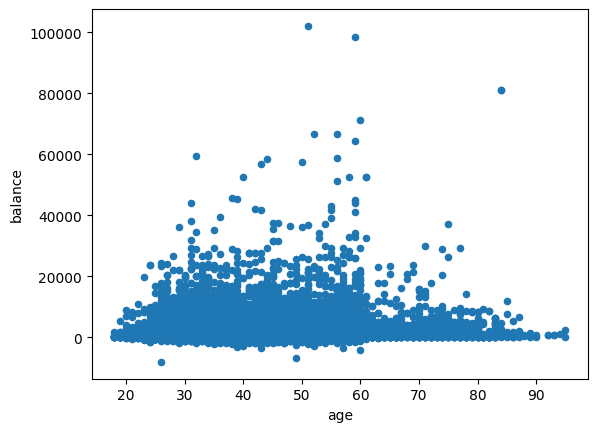

In [484]:
#plot the scatter plot of balance and age variable in inp1
inp0.plot.scatter(x = "age", y = "balance")
plt.show()

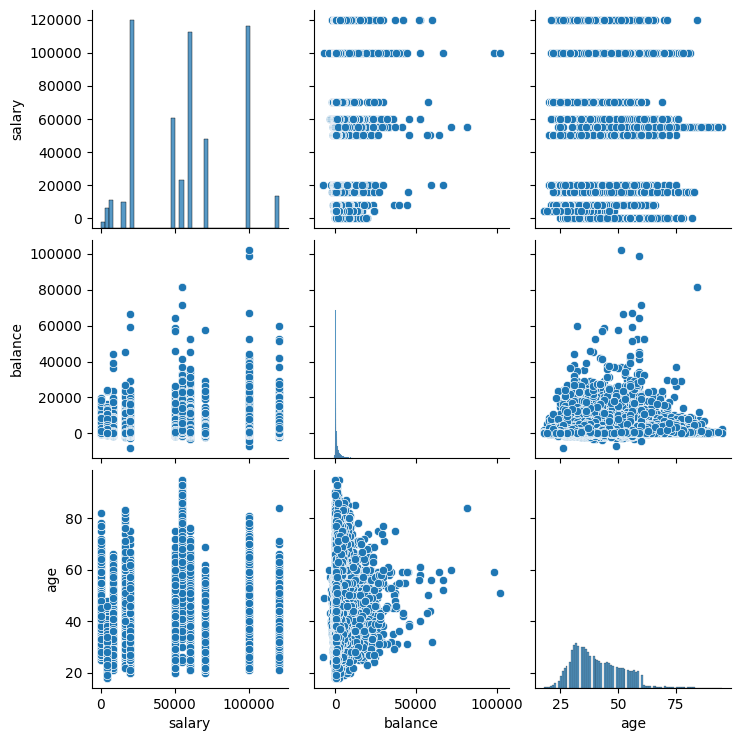

In [485]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data = inp0, vars= ["salary", "balance", "age"])
plt.show()

In [486]:
inp0[["age", "salary", "balance"]].corr() # calculate the correlation matrix

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055469
balance,0.097755,0.055469,1.000000


#### Correlation heat map 

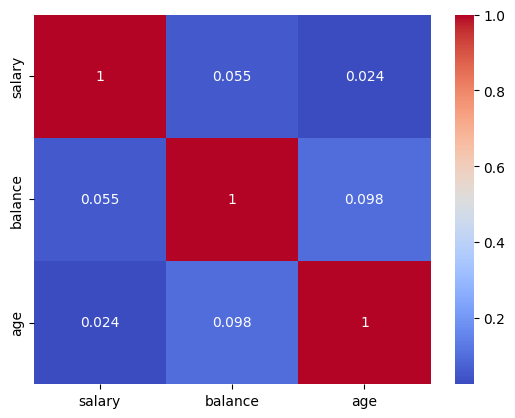

In [487]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp0[["salary", "balance", "age"]].corr(), annot = True, cmap = "coolwarm") # annot = True to show the correlation values
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [488]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp0.groupby("response")["salary"].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [489]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp0.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

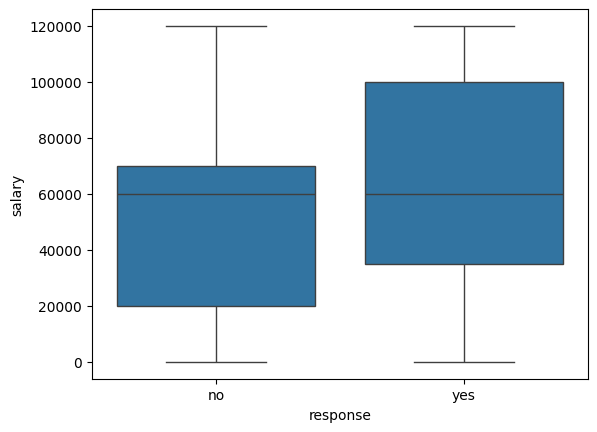

In [490]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp0, x = "response", y = "salary")
plt.show()

#### Balance vs response 
- we know the balance is highly skewed - has very high values!

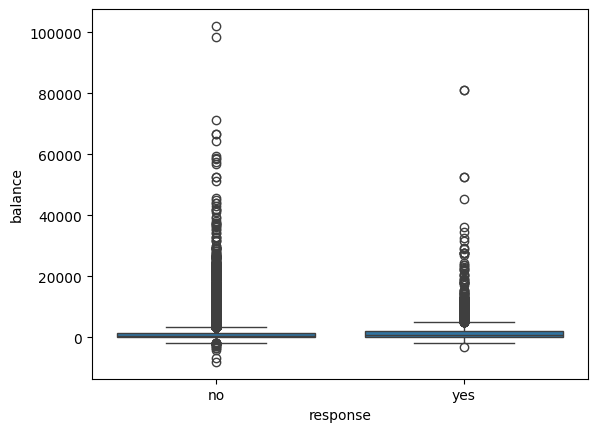

In [491]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp0, x = "response", y = "balance")
plt.show()

In [492]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp0.groupby('response')['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [493]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp0.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [494]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [495]:
#calculate the mean, median and 75th percentile of balance with response
inp0.groupby('response')['balance'].agg(['mean', 'median', p75])

,mean,median,p75
response,,,
no,1304.094525,417.0,1345.0
yes,1804.832041,733.0,2159.5


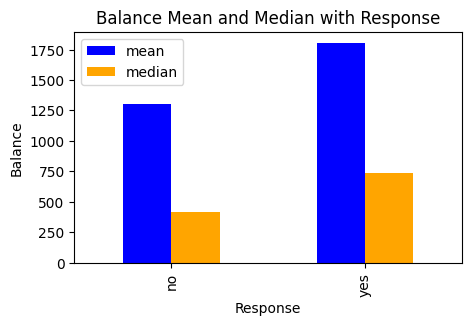

In [496]:
#plot the bar graph of balance's mean an median with response.
inp0.groupby('response')['balance'].agg(['mean', 'median']).plot(kind = "bar", figsize = (5, 3), color = ["blue", "orange"])
plt.title("Balance Mean and Median with Response")
plt.ylabel("Balance")
plt.xlabel("Response")
plt.show()

#### Education vs salary 

In [497]:
#groupby the education to find the mean of the salary education category.
inp0.groupby('education')['salary'].mean()

education
primary      34212.377755
secondary    49743.815188
tertiary     82873.618525
unknown      46558.427571
Name: salary, dtype: float64

In [498]:
#groupby the education to find the median of the salary for each education category.
inp0.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [499]:
#groupby the job to find the mean of the salary for each job category.
inp0.groupby('job')['salary'].mean()


job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [500]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp0['response_flag'] = np.where(inp0.response == "yes", 1, 0)

#### Education vs response rate

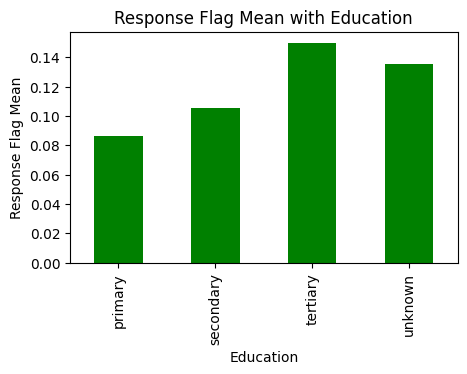

In [501]:
#calculate the mean of response_flag with different education categories.
inp0.groupby('education')['response_flag'].mean()
#calculate the mean of response_flag with different job categories.
inp0.groupby('job')['response_flag'].mean()
#plot the bar graph of response_flag with different education categories.
inp0.groupby('education')['response_flag'].mean().plot(kind = "bar", figsize = (5, 3), color = "green")
plt.title("Response Flag Mean with Education")
plt.ylabel("Response Flag Mean")
plt.xlabel("Education")
plt.show()

#### Marital vs response rate 

In [502]:
#calculate the mean of response_flag with different marital status categories.
marital_response_rate = inp0.groupby('marital')['response_flag'].mean().sort_values(ascending=False)
marital_response_rate


marital
single      0.149414
divorced    0.119455
married     0.101198
Name: response_flag, dtype: float64

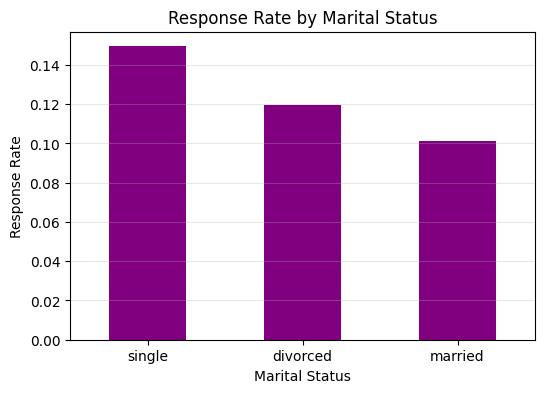

In [503]:
#plot the bar graph of marital status with average value of response_flag
plt.figure(figsize=(6, 4))
marital_response_rate.plot(kind='bar', color='purple')
plt.title('Response Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

#### Loans vs response rate 

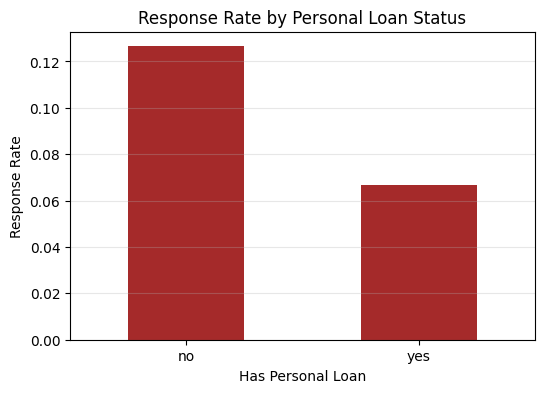

In [504]:
#plot the bar graph of personal loan status with average value of response_flag
loan_response_rate = inp0.groupby('loan')['response_flag'].mean()

plt.figure(figsize=(6, 4))
loan_response_rate.plot(kind='bar', color='brown')
plt.title('Response Rate by Personal Loan Status')
plt.xlabel('Has Personal Loan')
plt.ylabel('Response Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


#### Housing loans vs response rate 

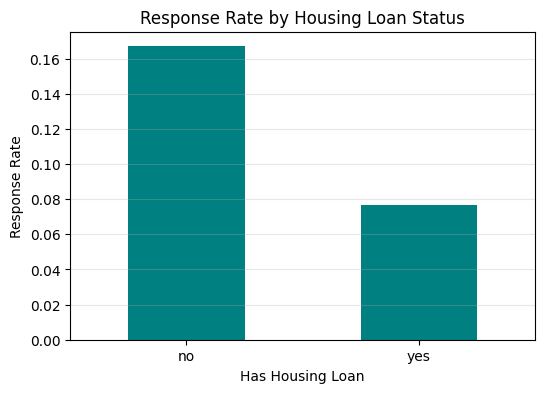

In [505]:
#plot the bar graph of housing loan status with average value of response_flag
housing_response_rate = inp0.groupby('housing')['response_flag'].mean()

plt.figure(figsize=(6, 4))
housing_response_rate.plot(kind='bar', color='teal')
plt.title('Response Rate by Housing Loan Status')
plt.xlabel('Has Housing Loan')
plt.ylabel('Response Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


#### Age vs response 

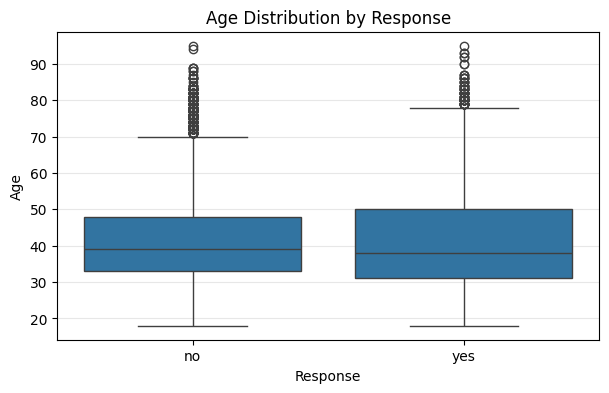

In [506]:
#plot the boxplot of age with response
plt.figure(figsize=(7, 4))
sns.boxplot(x='response', y='age', data=inp0)
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.3)
plt.show()


##### making buckets from age columns 

In [507]:
#create the buckets of <30, 30-40, 40-50, 50-60 and 60+ from age column.
# Define age buckets
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Create age_group column
inp0['age_group'] = pd.cut(inp0['age'], bins=age_bins, labels=age_labels, right=False)

# Check the distribution
print("Age group distribution:")
print(inp0['age_group'].value_counts().sort_index())

Age group distribution:
age_group
<30       5271
30-40    18081
40-50    11651
50-60     8404
60+       1784
Name: count, dtype: int64


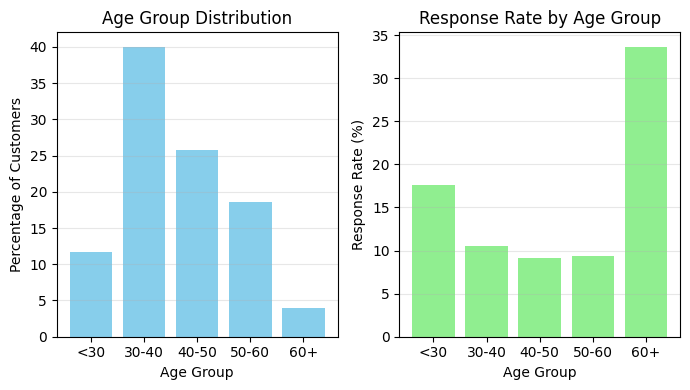

In [508]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.

# Calculate metrics
age_distribution = inp0['age_group'].value_counts(normalize=True).sort_index() * 100
age_response_rate = inp0.groupby('age_group')['response_flag'].mean().sort_index() * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Plot 1: Age distribution
axes[0].bar(age_distribution.index, age_distribution.values, color='skyblue')
axes[0].set_title('Age Group Distribution')
axes[0].set_ylabel('Percentage of Customers')
axes[0].set_xlabel('Age Group')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Response rate by age group
axes[1].bar(age_response_rate.index, age_response_rate.values, color='lightgreen')
axes[1].set_title('Response Rate by Age Group')
axes[1].set_ylabel('Response Rate (%)')
axes[1].set_xlabel('Age Group')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

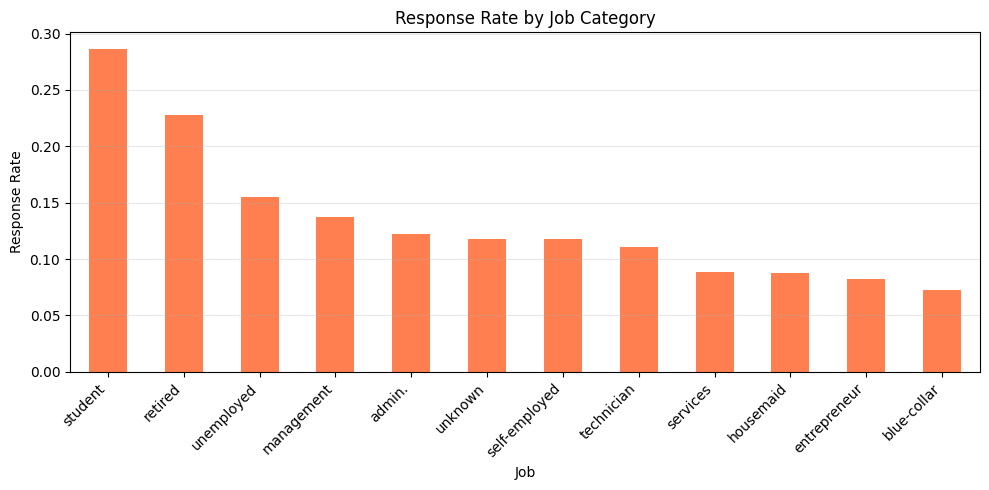

In [509]:
#plot the bar graph of job categories with response_flag mean value.

# Calculate response rate by job
job_response = inp0.groupby('job')['response_flag'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
job_response.plot(kind='bar', color='coral')
plt.title('Response Rate by Job Category')
plt.xlabel('Job')
plt.ylabel('Response Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

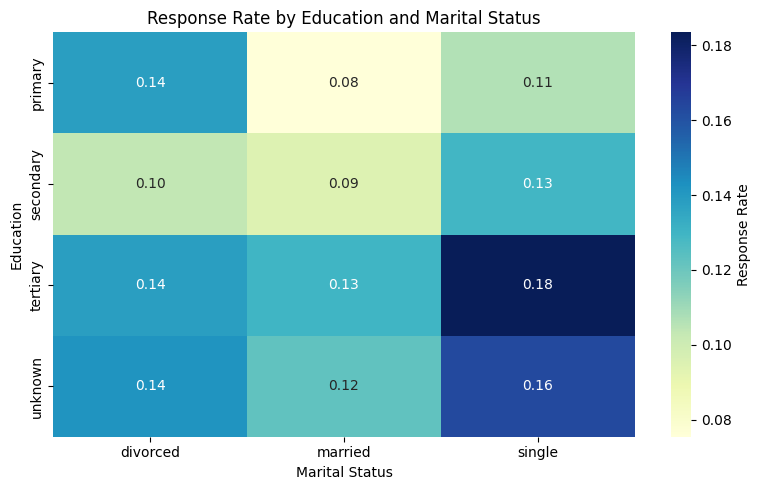

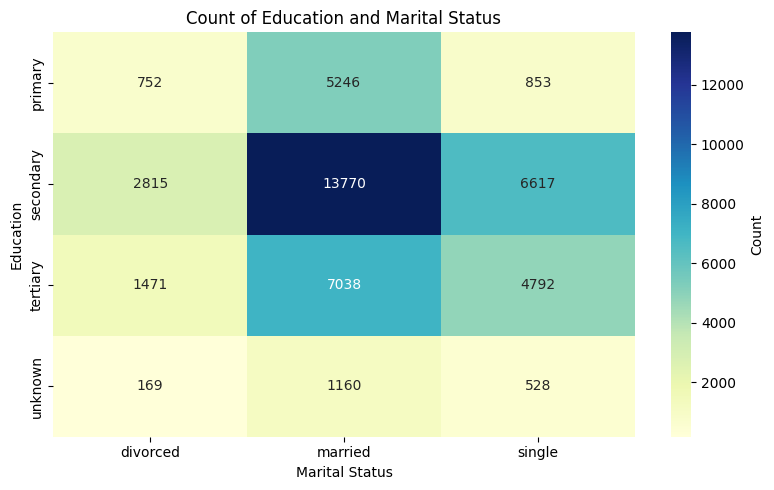

In [510]:
#create heat map of education vs marital vs response_flag

# Create a pivot table for education vs marital vs response
education_marital_response = pd.pivot_table(
    data=inp0, 
    values='response_flag', 
    index='education', 
    columns='marital',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(education_marital_response, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Response Rate'})
plt.title('Response Rate by Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.tight_layout()
plt.show()

# Create a pivot table for education vs marital status
education_marital = pd.pivot_table(
    data=inp0, 
    values='response_flag', 
    index='education', 
    columns='marital',
    aggfunc='count'
)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(education_marital, annot=True, cmap='YlGnBu', fmt='.0f', cbar_kws={'label': 'Count'})
plt.title('Count of Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.tight_layout()
plt.show()


#### Job vs marital vs response 

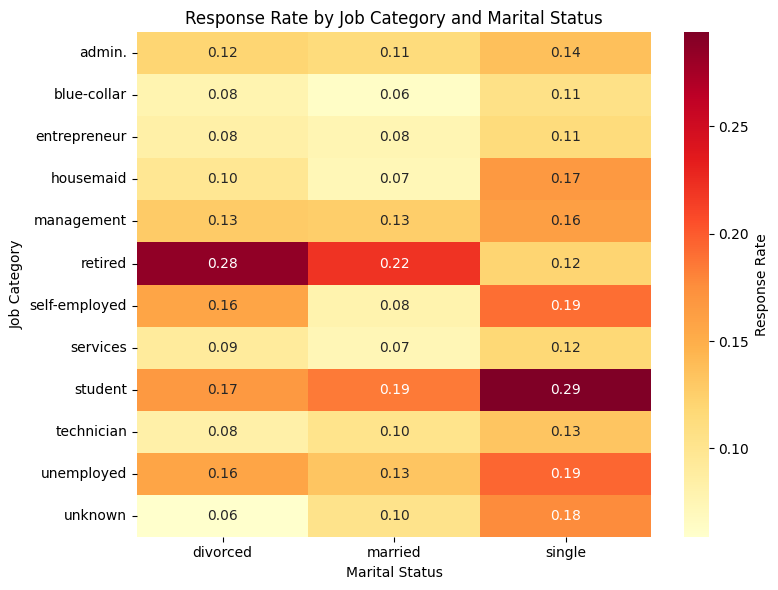

In [511]:
#create the heat map of Job vs marital vs response_flag.

# Create pivot table for job vs marital vs response
job_marital_response = pd.pivot_table(
    data=inp0, 
    values='response_flag', 
    index='job', 
    columns='marital',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(job_marital_response, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Response Rate'})
plt.title('Response Rate by Job Category and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

#### Education vs poutcome vs response

<Figure size 640x480 with 0 Axes>

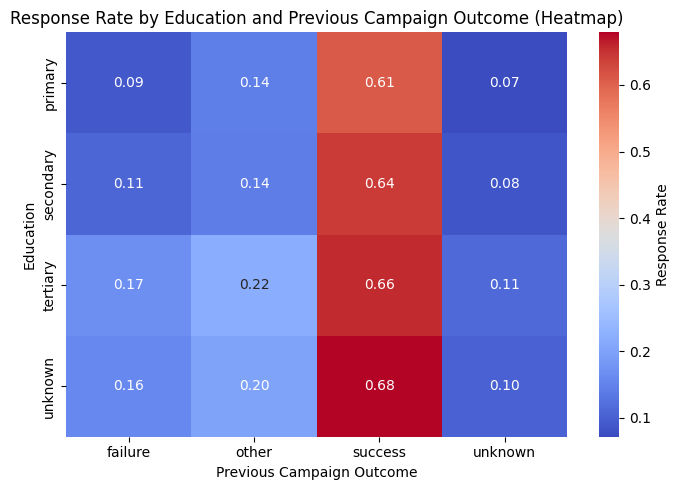

In [512]:
#create the heat map of education vs poutcome vs response_flag.

# Create pivot table for education vs poutcome vs response
education_poutcome_response = pd.pivot_table(
    data=inp0, 
    values='response_flag', 
    index='education', 
    columns='poutcome',
    aggfunc='mean'
)
plt.tight_layout()
plt.show()

#education vs poutcome heatmap
education_poutcome = pd.pivot_table(
    data=inp0, 
    values='response_flag', 
    index='education', 
    columns='poutcome',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(education_poutcome, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Response Rate'})
plt.title('Response Rate by Education and Previous Campaign Outcome (Heatmap)')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Education')
plt.tight_layout()
plt.show()